In [26]:
import matplotlib.pyplot as plt
import pydicom
import os
import cv2
from PIL import Image
import numpy as np

np.set_printoptions(threshold=np.inf)

In [27]:
path = "./XRAY TEST/xray"
files = os.listdir(path)

In [28]:
ds = []
#pixl_array包含了真实数据

for file in files:
    if not os.path.isdir(file):
        f = path+"/"+file
        data = pydicom.read_file(f)
        ds.append(data.pixel_array)

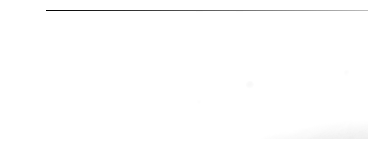

In [29]:
origin = ds[6]

#crop = origin[0:250, 150:800]

crop_1 = np.zeros((250,650), dtype = origin.dtype )

for i in range(0, 250):
    for j in range(150, 800):
        k = i
        t = j-150
        if origin[i][j] < 700:
            crop_1[k][t] = 4094 #对黑色边角的处理，直接设置最亮
        else:
            crop_1[k][t] = origin[i][j]
            
plt.imshow(crop_1,cmap="gray")
plt.axis("off")
plt.show()

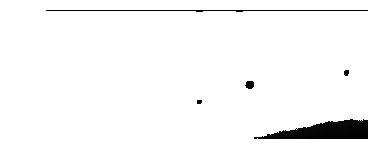

In [32]:
## 基于直方图均衡化
#算法的本质：重新分布图像的像素值
#增加了许多局部的对比度，而整体的对比度没有进行太大改变

# opencv 实现
tmp = np.zeros((250,650), dtype = origin.dtype )

cv2.normalize(crop_1,tmp, 0, 255, cv2.NORM_MINMAX)
tmp= cv2.convertScaleAbs(tmp)

equ = cv2.equalizeHist(tmp)

plt.imshow(equ,cmap="gray")
plt.axis("off")
plt.show()


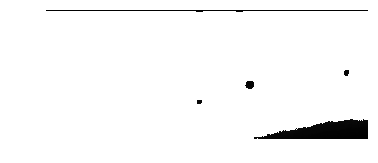

In [31]:
# numpy 实现
cv2.normalize(crop_1,crop_1, 0, 255, cv2.NORM_MINMAX)

lut = np.zeros(256, dtype = crop_1.dtype )#创建空的查找表  
  
hist,bins = np.histogram(crop_1.flatten(),256,[0,256])

 #计算累积直方图 
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0) #除去直方图中的0值  

cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
#等同于lut[i] = int(255.0 *p[i])公式  
cdf = np.ma.filled(cdf_m,0).astype('uint8') 
#将掩模处理掉的元素补为0  
  
#计算  
res = cdf[crop_1] #其实本质上也只是这一行公式

plt.imshow(res, cmap="gray")
plt.axis("off")
plt.show()